# Kaggle Competition - House Prices Advanced Regression Techniques 

## 1.Подготовительные работы
Прежде чем начать какие либо действия по анализу данных, нужно следующее:
- Понять Задачу.
"Predict sales prices and practice feature engineering, RFs, and gradient boosting."

Наша задача - предсказывать стоимость жилья, которая зависит от различных параметров и характеристик жилья.
- Изучить входные данные, характеристики жилья. Предварительно выделить те, которые по нашему мнению могут коррелировать между собой и влиять на цену жилья.

Т.к. я архитектор-реставратор и инженер-строитель (надеюсь, что в прошлом и навсегда), я могу опираясь на свой опыт выделить некоторые основные характеристики, которые могут наилучшим образом влиять на цену жилья. Заодно посмотрим, как мне это пригодится.

### 1.1.Краткое описанием данных:


*Сразу скажу, Май инглишь ис нот зэ бэст. Поэтому я для себя сразу сделаю перевод и оставлю, чтобы подсматривать.*

*Важные, по моему мнению, позиции я выделю в отдельную запись ниже.*

Data fields
Here's a brief version of what you'll find in the data description file.

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict. - цена продажи недвижимости в долларах. Это целевая переменная, которую вы пытаетесь предсказать.
- MSSubClass: The building class - Класс здания.
- MSZoning: The general zoning classification - Общая классификация зонирования.
- LotFrontage: Linear feet of street connected to property - Линейные футы улицы, связанной с собственностью.
- LotArea: Lot size in square feet - Размер участка в квадратных футах.
- Street: Type of road access - Тип доступа к дороге.
- Alley: Type of alley access - Тип доступа к переулку.
- LotShape: General shape of property - Общий вид собственности.
- LandContour: Flatness of the property - Плоскостность собственности.
- Utilities: Type of utilities available - Тип доступных утилит.
- LotConfig: Lot configuration - Конфигурация лота.
- LandSlope: Slope of property - Уклон собственности.
- Neighborhood: Physical locations within Ames city limits - Физические местоположения в черте города Эймс.
- Condition1: Proximity to main road or railroad - Близость к главной дороге или железной дороге.
- Condition2: Proximity to main road or railroad (if a second is present) - Близость к главной дороге или железной дороге (если есть вторая).
- BldgType: Type of dwelling - Тип жилья.
- HouseStyle: Style of dwelling - Стиль проживания.
- OverallQual: Overall material and finish quality - Общее качество материала и отделки.
- OverallCond: Overall condition rating - Общая оценка состояния.
- YearBuilt: Original construction date - Первоначальная дата постройки.
- YearRemodAdd: Remodel date - Дата реконструкции.
- RoofStyle: Type of roof - Тип крыши.
- RoofMatl: Roof material - Кровельный материал.
- Exterior1st: Exterior covering on house - Наружное покрытие дома.
- Exterior2nd: Exterior covering on house (if more than one material) - Наружное покрытие дома (если более одного материала)
- MasVnrType: Masonry veneer type - Кирпичная кладка типа шпона.
- MasVnrArea: Masonry veneer area in square feet - Площадь каменной кладки в квадратных метрах.
- ExterQual: Exterior material quality - Качество материалов экстерьера (Внешняя отделка).
- ExterCond: Present condition of the material on the exterior - Текущее состояние материала снаружи.
- Foundation: Type of foundation - Тип фундамента.
- BsmtQual: Height of the basement - Высота подвала.
- BsmtCond: General condition of the basement - Общее состояние подвала.
- BsmtExposure: Walkout or garden level basement walls - Выходные или подвальные стены на уровне сада.
- BsmtFinType1: Quality of basement finished area - Качество отделки цокольного этажа.
- BsmtFinSF1: Type 1 finished square feet - Тип 1 готовые квадратные футы. (видимо с отделкой)
- BsmtFinType2: Quality of second finished area (if present) - Качество второй обработанной области (если есть). Качество отделки, как я могу предположить.
- BsmtFinSF2: Type 2 finished square feet - Тип 2 готовые квадратные футы. (видимо с отделкой)
- BsmtUnfSF: Unfinished square feet of basement area - Незавершенные квадратные метры цокольного этажа. (видимо без отделки).
- TotalBsmtSF: Total square feet of basement area - Общая площадь подвала в квадратных метрах.
- Heating: Type of heating - Тип отопления.
- HeatingQC: Heating quality and condition - Качество и состояние отопления.
- CentralAir: Central air conditioning - Центральное кондиционирование.
- Electrical: Electrical system - Электрическая система.
- 1stFlrSF: First Floor square feet - Площадь первого этажа.
- 2ndFlrSF: Second floor square feet - Площадь второго этажа.
- LowQualFinSF: Low quality finished square feet (all floors) - Квадратные футы с отделкой низкого качества (все этажи).
- GrLivArea: Above grade (ground) living area square feet - Надземная (земля) жилая площадь квадратных футов.
- BsmtFullBath: Basement full bathrooms - Полноценные санузлы на цокольном этаже.
- BsmtHalfBath: Basement half bathrooms - Ванные комнаты в полуподвале.
- FullBath: Full bathrooms above grade - Полноценные ванные комнаты выше уровня земли.
- HalfBath: Half baths above grade - Полуванны выше класса.
- Bedroom: Number of bedrooms above basement level - Количество спален выше цокольного этажа.
- Kitchen: Number of kitchens - Количество кухонь.
- KitchenQual: Kitchen quality - Качество кухонь.
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms) - Всего номеров выше класса (без ванных комнат).
- Functional: Home functionality rating - Рейтинг домашней функциональности.
- Fireplaces: Number of fireplaces - Количество каминов.
- FireplaceQu: Fireplace quality - Качество камина.
- GarageType: Garage location - Расположение гаража.
- GarageYrBlt: Year garage was built - Год постройки гаража.
- GarageFinish: Interior finish of the garage - Внутренняя отделка гаража.
- GarageCars: Size of garage in car capacity - Размер гаража вместимость автомобиля.
- GarageArea: Size of garage in square feet - Площадь гаража в квадратных метрах.
- GarageQual: Garage quality - Качество гаража.
- GarageCond: Garage condition - Состояние гаража.
- PavedDrive: Paved driveway - Асфальтированная дорога.
- WoodDeckSF: Wood deck area in square feet - Площадь деревянного настила в квадратных метрах.
- OpenPorchSF: Open porch area in square feet - Площадь открытой веранды в квадратных метрах.
- EnclosedPorch: Enclosed porch area in square feet - Площадь крыльца в квадратных метрах.
- 3SsnPorch: Three season porch area in square feet - Площадь трехсезонного крыльца в квадратных метрах.
- ScreenPorch: Screen porch area in square feet - Площадь веранды в квадратных метрах.
- PoolArea: Pool area in square feet - Площадь бассейна в кв.м.
- PoolQC: Pool quality - Качество бассейна.
- Fence: Fence quality - Качество забора.
- MiscFeature: Miscellaneous feature not covered in other categories - Разная функция, не включенная в другие категории.
- MiscVal: '$' Value of miscellaneous feature - стоимость различных функций.
- MoSold: Month Sold - Месяц продажи.
- YrSold: Year Sold - Год продажи.
- SaleType: Type of sale - Тип продажи.
- SaleCondition: Condition of sale - Состояние продажи.

Основываясь на своем опыте, я выписал для себя показатели. Которые будут значительно влиять на цену жилья:
- SalePrice - цена продажи недвижимости в долларах. Это целевая переменная, которую вы пытаетесь предсказать.
- MSSubClass - Класс здания.
- LotArea - Размер участка в квадратных футах.
- LotShape - Общий вид собственности.
- Utilities - Тип доступных утилит.
- GrLivArea - Надземная жилая площадь квадратных футов.
- Neighborhood - Физические местоположения в черте города Эймс.
- Condition1 - Близость к главной дороге или железной дороге.
- Condition2 - Близость к главной дороге или железной дороге (если есть вторая).
- BldgType - Тип жилья.
- HouseStyle - Стиль проживания.
- OverallCond - Общая оценка состояния.
- YearBuilt - Первоначальная дата постройки.
- YearRemodAdd - Дата реконструкции.
- RoofStyle - Тип крыши.
- Exterior1st: Exterior covering on house - Наружное покрытие дома.
- Exterior2nd: Exterior covering on house (if more than one material) - Наружное покрытие дома (если более одного материала)
- ExterQual: Exterior material quality - Качество материалов экстерьера (Внешняя отделка).
- ExterCond: Present condition of the material on the exterior - Текущее состояние материала снаружи.
- Foundation: Type of foundation - Тип фундамента.

# 2.Анализ данных

In [7]:
## Загрузка необходимых инструментов
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [8]:
# Загрузка наших данных
df_train = pd.read_csv('Z:\\Programming\\DataSciense\\Kaggle\\02.Kaggle Competition - House Prices Advanced Regression Techniques\\01.data\\train.csv')
df_test = pd.read_csv('Z:\\Programming\\DataSciense\\Kaggle\\02.Kaggle Competition - House Prices Advanced Regression Techniques\\01.data\\test.csv')
ids = df_test['Id'].values

In [9]:
#Посмотрим на наши данные
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
#Взглянем на распределение нашей целевой переменной
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

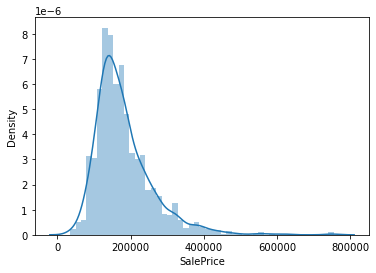

In [11]:
sns.distplot(df_train['SalePrice'])

В целом выглядит достаточно корректно. Да я не буду здесь втупую писать, как у других людей. А просто спокойно скопирую данный шаг)
Запишем целевую переменную в отдельную переменную, убрав ее из признаков.

In [12]:
y_train = df_train.SalePrice.values
x_train = df_train.drop('SalePrice', 1)

Т.к. у нас много разлиных данных, необходимо оценить их зависимости и проверить, от чего наибольшим образом зависит целевая переменная. 

<AxesSubplot:>

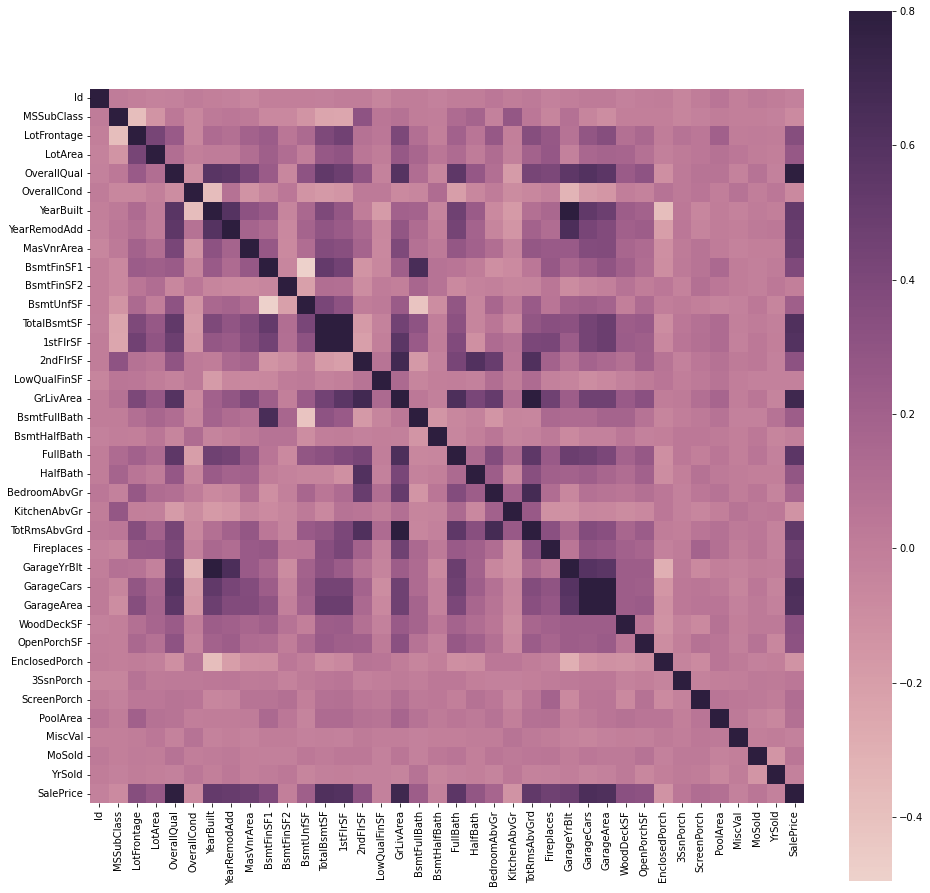

In [13]:
#correlation matrix
corrmat = df_train.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corrmat, vmax=.8, square=True, cmap=sns.cubehelix_palette(as_cmap=True))

Как мы можем видеть, подобная карта позваоляет нам бысро понять какие зависимости между параметрами у нас присутствуют.
Теперь давайте 

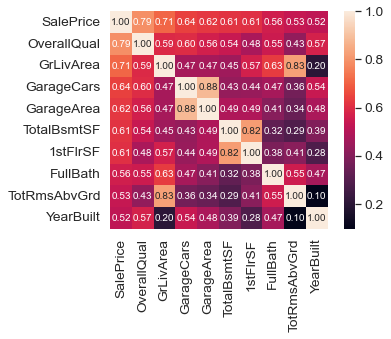

In [14]:
#получим 10 наиболее коррелирующий значений с нашим целевым параметром
k = 10 #количество необходимых значений
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Мои комментарии по поводу корреляции.
- GrLivArea - Надземная жилая площадь квадратных футов. Это первый параметр, в который я попал, основываясь на моем опыте в области проектирования и строительства. С одной стороны я безусловно удивлен. С другой стороны я понимаю, что будучи компетентным в строительстве и покупке дома, я буду оценивать дом по совершенном иным параметрам, в отличии от простых потребителей.
- OverallQual - Общее качество материала и отделки. Ну это предсказуемо, действительно люди смотрят на внешний вид, так сказать на обертку.
- GarageCars - Размер гаража вместимость автомобиля. Как по мне это очень странно. Потому что все таки гараж это больше нежилое помещение. Которое в целом нет необходимости отапливать, отделывать дорогостоящей отделкой и т.д.
- GarageArea - Площадь гаража. Аналогично. Тоже не понимаю если честно, это второстепенное помещение, это как если бы ценник дома зависил от площади подсобки. удивительно, но факт!
Так же в нашем анализе стоит обратить, что GarageArea напрямую зависит от GarageCars. Так что, из этих двух переменных мы можем взять любую.
- TotalBsmtSF - Общая площадь подвала в квадратных метрах. и 1stFlrSF: First Floor square feet - Площадь первого этажа. - так же очень похожи.
- FullBath - Полноценные ванные комнаты выше уровня земли. - это очень смешно. Так сказать люди "с жиру бесятся"
- TotRmsAbvGrd - Всего номеров выше класса (без ванных комнат). Это признак, который напрямую зависит от площади. Чем больше комнат. тем больше площадь. "Чем больше сыра, тем меньше сыра :D"
- YearBuilt - Год постройки. Это второй параметр, в который я попал. Тут в целом очевидно. Если смотреть со стороны потребителя, то естественно человек хочет поновее. И айфон последний :D

Теперь давайте построим Scatterplots, межды выявленными признаками.

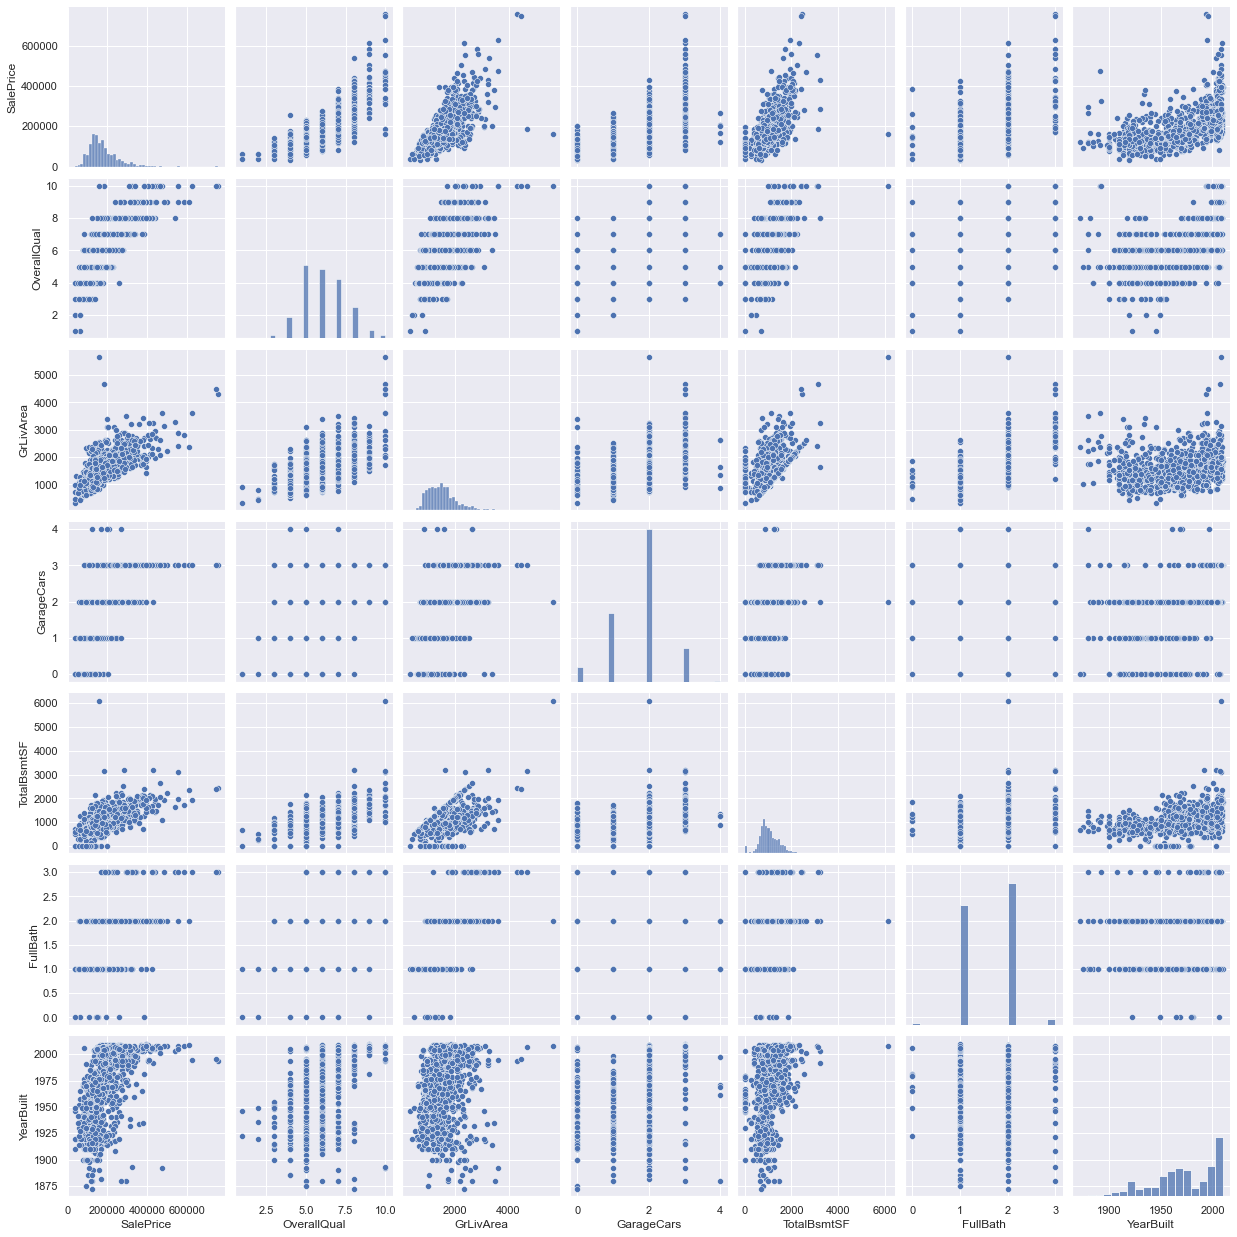

In [15]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

На данный момент я украду комментарий человечка с топовым ноутбуком. Сам так же отдельно посижу со своим ноутбуком и поанализирую данные.

Although we already know some of the main figures, this mega scatter plot gives us a reasonable idea about variables relationships.

One of the figures we may find interesting is the one between 'TotalBsmtSF' and 'GrLiveArea'. In this figure we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area (unless you're trying to buy a bunker).

The plot concerning 'SalePrice' and 'YearBuilt' can also make us think. In the bottom of the 'dots cloud', we see what almost appears to be a shy exponential function (be creative). We can also see this same tendency in the upper limit of the 'dots cloud' (be even more creative). Also, notice how the set of dots regarding the last years tend to stay above this limit (I just wanted to say that prices are increasing faster now).

Ok, enough of Rorschach test for now. Let's move forward to what's missing: missing data!

## 3.Обработка данных

- Взглянем на пропущенные значения в наших тренировочных данных


<AxesSubplot:>

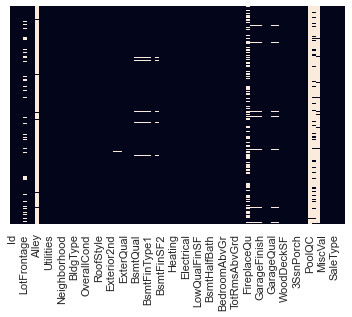

In [16]:
#Графический вариант, мне он очень нравится, когда взгляд замылен смотреть в цифры, оч помогает)
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False)

In [17]:
#Цифровой вариант
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


Итак. Мы можем наблюдать следующее:

Такие параметры, как PoolQC(Качество бассейна), MiscFeature(Разная функция, не включенная в другие категории), Alley(Тип доступа к переулку.), Fence(Качество забора), FireplaceQu(Количество каминов), LotFrontage(Общий вид собственности) имеют наибольшее количество пропусков данных >17%. От большинства мы откажемся. Просто дропнем их, кроме LotFrontage. Объясню почему я решил оставить вид собственности. Я конечно не уверен 100% и надо более глубоко погружаться в вопрос недвижимости. Но мне кажется, что наприме частная собственность или поселок или же это некий ТСЖ (как в РФ), тоже могут влиять на выбор при покупке здания. Поэтому заменю на моду.

Касаемо переменых, оценивающих Garage. Я их так же дропну, т.к. GarageCars отражает действительно важные данные для нас.

MasVnrArea и MasVnrType не несут особо важной информации. Т.к. отражают лишь материал строительства несущих конструкций, который сзачастую скрыт от глаз потребителя и в целом не несет роли при выборе дома. (Если ты конечно ничего в этом не понимаешь)

Electrical  так же скрытая от глаз вещь. Можно долго развивать данную тему. Но лично я понимаю, что при покупке (особенно старого дома). А лучше любого дома. Важно проверить и желательно заменить электрику. Поэтому ее мы тоже дропнем.

In [18]:
df_train = df_train.drop(columns=['PoolQC', 'MiscFeature','Alley','Fence','FireplaceQu'])
df_train = df_train.drop(columns=['GarageYrBlt', 'GarageCond','GarageType','GarageFinish','GarageQual'])
df_train = df_train.drop(columns=['MasVnrArea', 'MasVnrType','Electrical'])
df_train['LotFrontage']=df_train['LotFrontage'].fillna(df_train['LotFrontage'].mode()[0])
df_train.isnull().sum().max() #Проверка на наличие пустых значений

38

<AxesSubplot:>

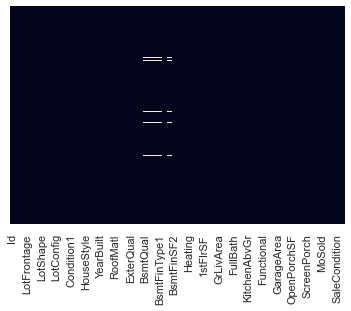

In [19]:
#Графический вариант, мне он очень нравится, когда взгляд замылен смотреть в цифры, оч помогает)
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False)

Что то я пропустил совсем параметры: 'BsmtFinType2' и 'BsmtExposure', отвечающие за качество отделки цоколя. На который как правило стандартному потребителю плевать. Так же дропну их.

In [20]:
df_train = df_train.drop(columns=['BsmtFinType2', 'BsmtExposure'])

In [21]:
df_train.isnull().sum().max() #Проверка на наличие пустых значений

37

<AxesSubplot:>

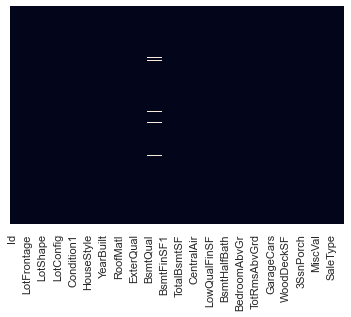

In [22]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False)

In [23]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
BsmtFinType1,37,0.025342
BsmtCond,37,0.025342
BsmtQual,37,0.025342
Id,0,0.000000
BsmtHalfBath,0,0.000000
KitchenQual,0,0.000000
KitchenAbvGr,0,0.000000
BedroomAbvGr,0,0.000000
HalfBath,0,0.000000
FullBath,0,0.000000


In [24]:
#все люди ошибаются и я в том числе. Так что дропнем остальные данные. которые нам не важны
#Ноутбук буду прилизывать после, он все таки учебный
df_train = df_train.drop(columns=['BsmtFinType1', 'BsmtCond','BsmtQual'])

In [25]:
df_train.isnull().sum().max() #Проверка на наличие пустых значений

0

Балдеж!

#### Займемся тестовыми данными. Дропать строки нельзя

In [26]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [27]:
df_test = df_test.drop((missing_data[missing_data['Total'] > 81]).index,1)
df_test = df_test.apply(lambda x:x.fillna(x.value_counts().index[0]))
#Комментарий для меня. Вот в это месту необходимо будет вернуться и разобраться.

# Подготовка данных. Нормировка и очистка¶


Удалим идентификаторы, так как они уникальны и неифнормативны. Сразу сделаем тоже для теста

In [28]:
x_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)

In [29]:
x_train.shape

(1460, 79)

Энкодинг категориальных переменных - переводим в численные значения. аналогично для теста

In [30]:
x_train.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [31]:
from sklearn.preprocessing import LabelEncoder
cols = x_train.select_dtypes(include='object').columns

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(x_train[c].values)) 
    x_train[c] = lbl.transform(list(x_train[c].values))
    df_test[c] = lbl.transform(list(df_test[c].values))

print('Shape all_data: {}'.format(x_train.shape))

Shape all_data: (1460, 79)


очистим данные от выбросов:

In [32]:
indexes = x_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index 

x_train = x_train.drop(indexes)
y_train = np.delete(y_train, indexes)

In [35]:
y_train.shape

(1458,)

# Построение модели
Все что будет ниже, я честно говорю, что украл. Я новичок и учусь на чужом опыте, т.к. в курсах хрена с два что нормально разбирают и т.д. 
Сейчас 09.02.2023. Курс от МФТИ начинается 18.02.2023 И я только только начинаю во все разбираться и соответственно корректного опыта у меня нет. Так что воруя этот ноутбук я смотрю на практике решения других людей. Разбираю их и создаю новые нейронные связи в своей голове.

In [38]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [39]:
model_xgb = xgb.XGBRegressor(n_estimators=2200)

In [40]:
n_folds = 5

def rmsle(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [41]:
x_train.shape

(1458, 79)

In [42]:
model_xgb.fit(x_train, y_train)
xgb_train_pred = model_xgb.predict(x_train)
xgb_pred = model_xgb.predict(df_test)
print(rmsle(y_train, xgb_train_pred))

0.06266430266811025


После нескольких итераций, все еще простой регрессор с болшим количеством эстиматоров дал неплохой результат! Пока не выглядит как топ-1 скор: сохраним результат и попробуем засабмитить

In [43]:
xgb_pred

array([126481.36, 151012.47, 175988.66, ..., 162464.72, 123228.11,
       217889.45], dtype=float32)

In [44]:
sub = pd.DataFrame()
sub['Id'] = ids
sub['SalePrice'] = xgb_pred
sub.to_csv('submission.csv',index=False)

Потюним модельку, попробуем немного подняться



In [47]:
model_xgb = xgb.XGBRegressor(reg_lambda=0.8571, n_estimators=2200, nthread = -1)

In [48]:
model_xgb.fit(x_train, y_train)
xgb_train_pred = model_xgb.predict(x_train)
xgb_pred = model_xgb.predict(df_test)
print(rmsle(y_train, xgb_train_pred))

0.03206555132504986


# GridSearch¶

Запустим GridSearch чтобы подобрать параметры получше.

Что будем настраивать: параметры max_depth, min_child_weight и gamma непосредственно ограничивают сложность модели, subsample и colsample_bytree делают её более устойчивой к шуму за счет добавления случайного выбора наблюдений и предикторов. reg_lambda и reg_alpha - параметры регуляризации: увеличивая можно сделать модель более устойчивой.

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'min_child_weight':[4,5], 'gamma':[i/10.0 for i in range(3,6)],  'subsample':[i/10.0 for i in range(6,11)],
'colsample_bytree':[i/10.0 for i in range(4,11)], 'max_depth': [2,3,4], 'reg_lambda':[i/10.0 for i in range(7,9)], 'reg_alpha':[i/10.0 for i in range(4,7)]}

model = xgb.XGBRegressor(nthread=-1) 

grid = GridSearchCV(model, params)
grid.fit(x_train, y_train)

In [52]:
xgb_train_pred = grid.best_estimator_.predict(x_train)
xgb_pred = grid.best_estimator_.predict(df_test)
print(rmsle(y_train, xgb_train_pred))

15661.501176686383


Пока эта махина перебирала параметры, я посмотрела все открытые решения в топ-1000 в лидеборде и стало понятно, что можно и не ждать =). Собственно, есть два основных решения:

Обучаем все подряд и стакаем, подбирая коэффициенты, чтобы забраться повыше.
Супер-лайфхак(топ-1), который я разберу в самом конце